# Topics:

- [ ] Importing the libraries
- [ ] Importing the dataset
- [ ] Missing values
- [ ] Encoding categorical data
- - [ ] Encoding the Independent Variable
- - [ ] Encoding the Dependent Variable
- [ ] Splitting the dataset into the Training set and Test set
- [ ] Feature Scaling

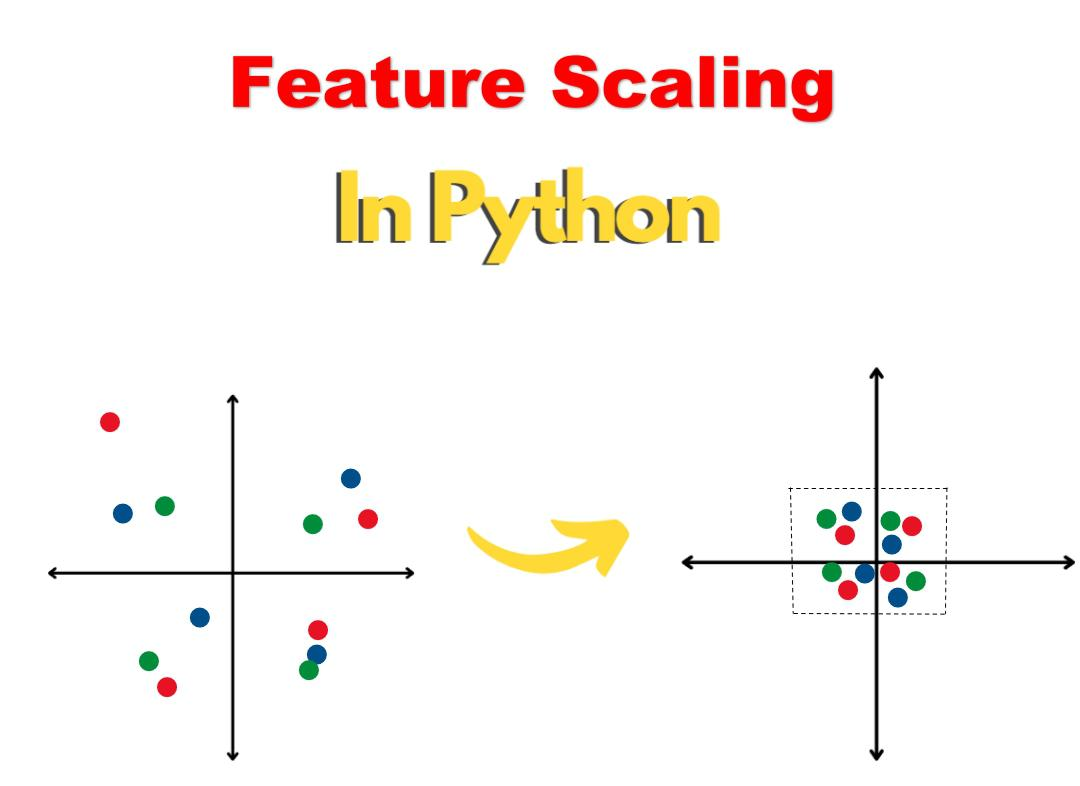

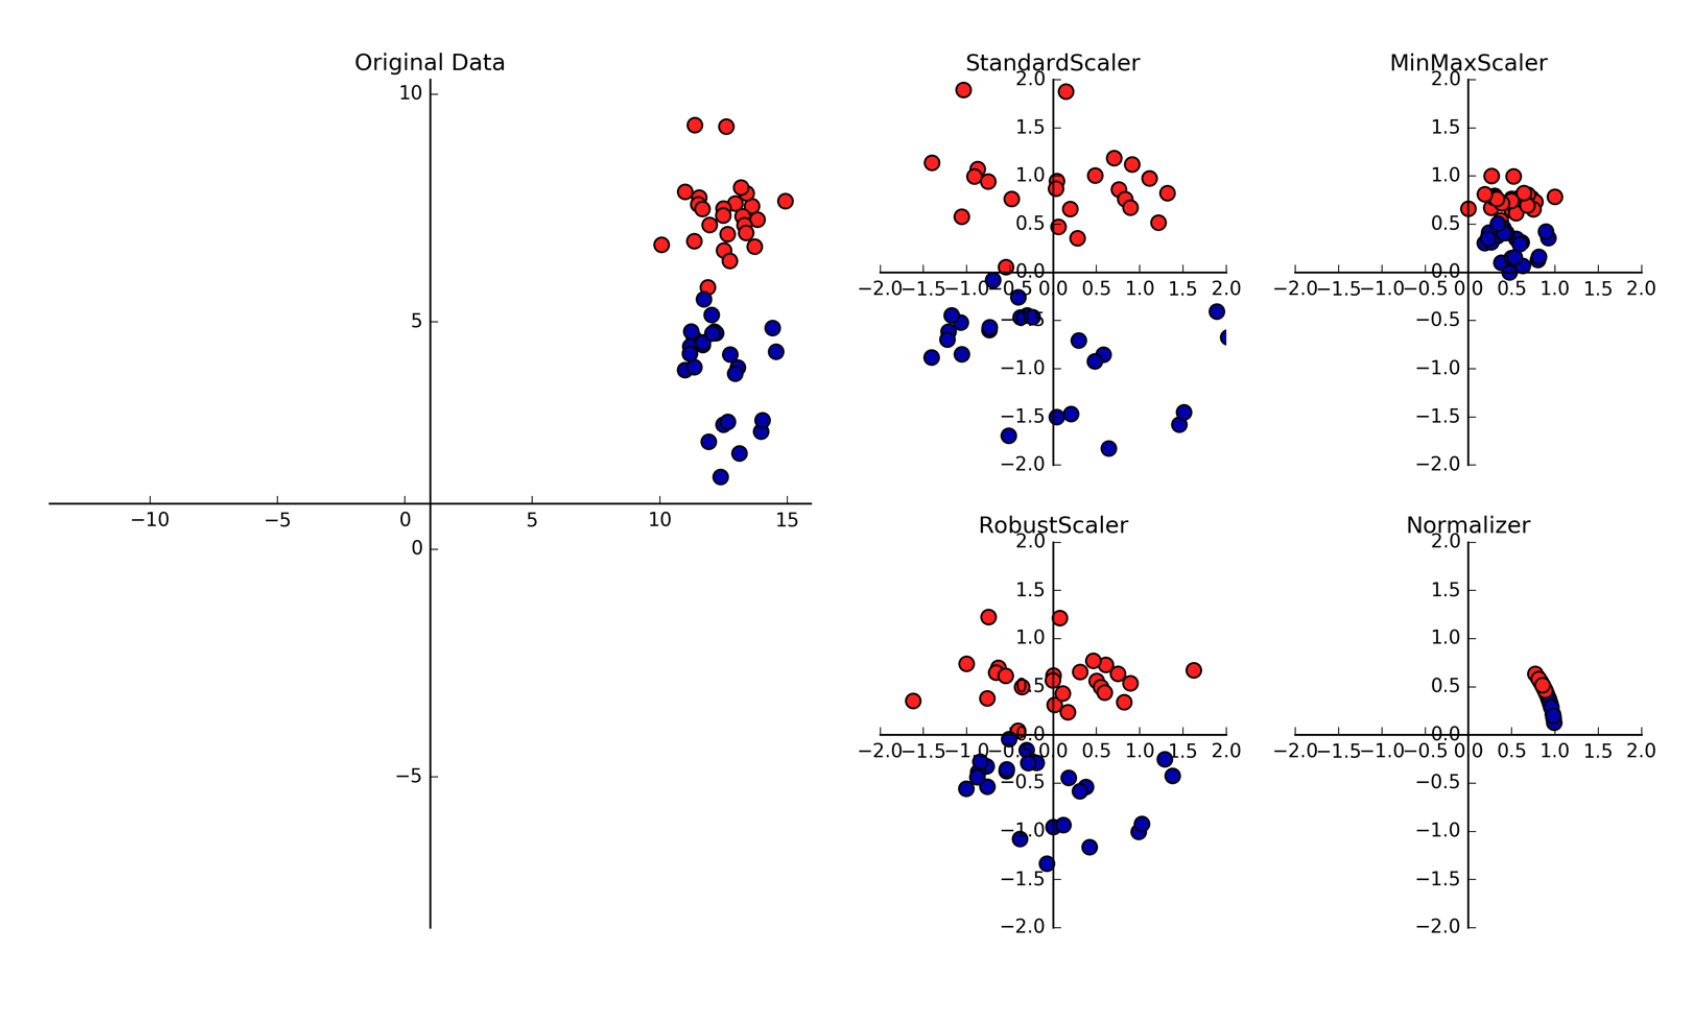

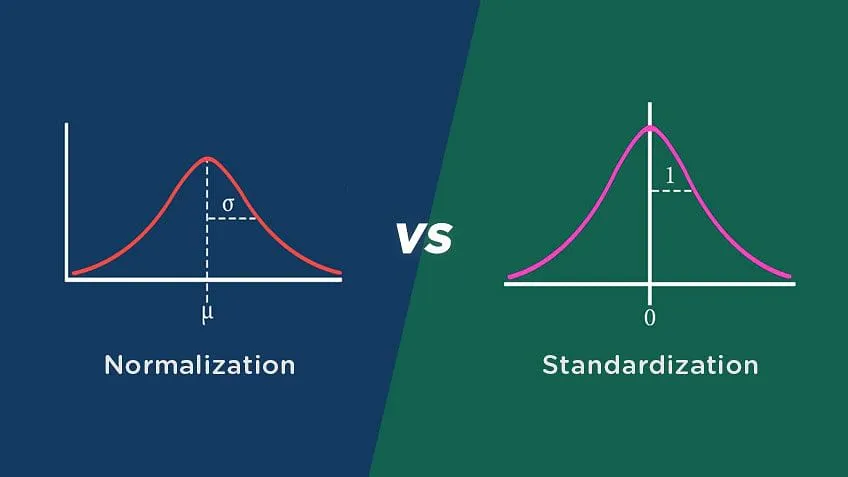

# Importing Libraries

In [1]:
%matplotlib inline
# Bring in required packages
import numpy as np
# Bring in required packages
import pandas as pd
# Bring in required packages
import matplotlib.pyplot as plt
# Bring in required packages
import seaborn as sns
# Bring in required packages
import sklearn

# importing Dataset 

## (Solution 1)

In [2]:
# Read data from a CSV file
df = pd.read_csv('Data.csv')

In [3]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 448.0+ bytes


In [12]:
# Define or update dataframe content
z= df.iloc[:, :-1]
type(z)

pandas.core.frame.DataFrame

In [13]:
z

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [5]:
# Define or update dataframe content
X = df.iloc[:, :-1].values
# Define or update dataframe content
y = df.iloc[:, -1].values

In [6]:
# Output the result
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [7]:
# Output the result
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [9]:
type(y)

numpy.ndarray

## (Solution 2)


In [14]:
df.columns

Index(['Country', 'Age', 'Salary', 'Purchased'], dtype='object')

In [15]:
# Define or update dataframe content
X = df[['Country', 'Age', 'Salary']].values
# Define or update dataframe content
y = df ['Purchased'].values

In [16]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [17]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

# Missing Values

### Sources of Missing Values

Before we dive into code, it’s important to understand the sources of missing data. Here’s some typical reasons why data is missing:

* User forgot to fill in a field.
* Data was lost while transferring manually from a legacy database.
* There was a programming error.
* Users chose not to fill out a field tied to their beliefs about how the results would be used or interpreted.

In [20]:
df.isnull().sum()

Country      0
Age          1
Salary       1
Purchased    0
dtype: int64

## (Solution 1) Dropna

In [21]:
# Define or update dataframe content
df_dropna = df.copy()

In [22]:
# summarize the shape of the raw data
# Output the result
print("Before:",df_dropna.shape)

# drop rows with missing values
# Define or update dataframe content
df_dropna.dropna(inplace=True)

# summarize the shape of the data with missing rows removed
# Output the result
print("After:",df_dropna.shape)

Before: (10, 4)
After: (8, 4)


## (Solution 2) Use Fillna

In [23]:
# Define or update dataframe content
df_fillna = df.copy()

In [24]:
df_fillna

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [25]:
# fill missing values with mean column values
# Define or update dataframe content
df_fillna.fillna(df_fillna.mean(), inplace=True)
# count the number of NaN values in each column
# Output the result
print(df_fillna.isnull().sum())

df_fillna

Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


,Country,Age,Salary,Purchased
0,France,44.000000,72000.000000,No
1,Spain,27.000000,48000.000000,Yes
2,Germany,30.000000,54000.000000,No
3,Spain,38.000000,61000.000000,No
4,Germany,40.000000,63777.777778,Yes
5,France,35.000000,58000.000000,Yes
6,Spain,38.777778,52000.000000,No
7,France,48.000000,79000.000000,Yes
8,Germany,50.000000,83000.000000,No
9,France,37.000000,67000.000000,Yes


## (Solution 3) Use Scikit-learn

The scikit-learn library provides the SimpleImputer pre-processing class that can be used to replace missing values.

It is a flexible class that allows you to specify the value to replace (it can be something other than NaN) and the technique used to replace it (such as mean, median, or mode). The SimpleImputer class operates directly on the NumPy array instead of the DataFrame.

In [26]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [27]:
# Bring in required packages
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Train the scaler using the dataset
imputer.fit(X[:, 1:3])
# Perform feature scaling on data
X[:, 1:3] = imputer.transform(X[:, 1:3])
#imputer.fit_transform(X[:, 1:3])

In [28]:
# Output the result
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


# Encoding the Independent Variable

<img src="https://chrisalbon.com/images/machine_learning_flashcards/One-Hot_Encoding_print.png" width=75% />

In [29]:
# Bring in required packages
from sklearn.compose import ColumnTransformer
# Bring in required packages
from sklearn.preprocessing import OneHotEncoder
# Perform feature scaling on data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
# Perform feature scaling on data
X = np.array(ct.fit_transform(X))

In [30]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [31]:
# Output the result
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Pandas (get_dummies)

In [32]:
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [ ]:
# Define or update dataframe content
pd.get_dummies(df,columns=["Country"])

In [33]:
pd.get_dummies(df)

,Age,Salary,Country_France,Country_Germany,Country_Spain,Purchased_No,Purchased_Yes
0,44.0,72000.0,1,0,0,1,0
1,27.0,48000.0,0,0,1,0,1
2,30.0,54000.0,0,1,0,1,0
3,38.0,61000.0,0,0,1,1,0
4,40.0,NaN,0,1,0,0,1
5,35.0,58000.0,1,0,0,0,1
6,NaN,52000.0,0,0,1,1,0
7,48.0,79000.0,1,0,0,0,1
8,50.0,83000.0,0,1,0,1,0
9,37.0,67000.0,1,0,0,0,1


# Encoding the Dependent Variable

In [34]:
# Bring in required packages
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Perform feature scaling on data
y = le.fit_transform(y)

In [35]:
# Output the result
print(y)

[0 1 0 0 1 1 0 1 0 1]


#  Splitting the dataset into the Training set and Test set

<img src="https://files.realpython.com/media/Splitting-Datasets-With-sklearns-train_test_split_Watermarked.e321471660be.jpg" width=75% />

In [36]:
# Bring in required packages
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [37]:
# Output the result
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [41]:
X_train.shape

(8, 5)

In [38]:
# Output the result
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [39]:
# Output the result
print(y_train)

[0 1 0 0 1 1 0 1]


In [40]:
# Output the result
print(y_test)

[0 1]


# Feature Scaling

Feature Scaling or Standardization: It is a step of Data Pre Processing which is applied to independent variables or features of data. It basically helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.

1) Min Max Scaler (Normalization)

2) Standard Scaler

Another reason why feature scaling is applied is that few algorithms like gradient descent converge much faster with feature scaling than without it.

# MinMaxScaler

In [42]:
# Bring in required packages
from sklearn.preprocessing import MinMaxScaler
# Set up the scaler object
mm = MinMaxScaler()
# Perform feature scaling on data
X_train[:, 3:] = mm.fit_transform(X_train[:, 3:])
# Perform feature scaling on data
X_test[:, 3:] = mm.transform(X_test[:, 3:])

# StandardScaler

In [43]:
# Bring in required packages
from sklearn.preprocessing import StandardScaler
# Set up the scaler object
sc = StandardScaler()
# Perform feature scaling on data
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
# Perform feature scaling on data
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [44]:
# Output the result
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578537 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057581 -0.07013167641635436]
 [1.0 0.0 0.0 0.5667085065333245 0.6335624327104541]
 [0.0 0.0 1.0 -0.3045301939022482 -0.3078661727429788]
 [0.0 0.0 1.0 -1.9018011447007983 -1.4204636155515822]
 [1.0 0.0 0.0 1.1475343068237058 1.2326533634535486]
 [0.0 1.0 0.0 1.4379472069688963 1.5749910381638883]
 [1.0 0.0 0.0 -0.740149544120035 -0.5646194287757338]]


In [45]:
# Output the result
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830116 -0.9069571034860727]
 [1.0 0.0 0.0 -0.4497366439748436 0.20564033932252992]]


## When to use feature Scaling ...

1. Gradient Descent
2. Distance-Based Algorithms
3. Tree-Based Algorithms

### What is Normalization?

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

### What is Standardization?

Standardization is another scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.